In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Summary statistics of numerical features
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Data types of all columns
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Checking for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Univariate Analysis**

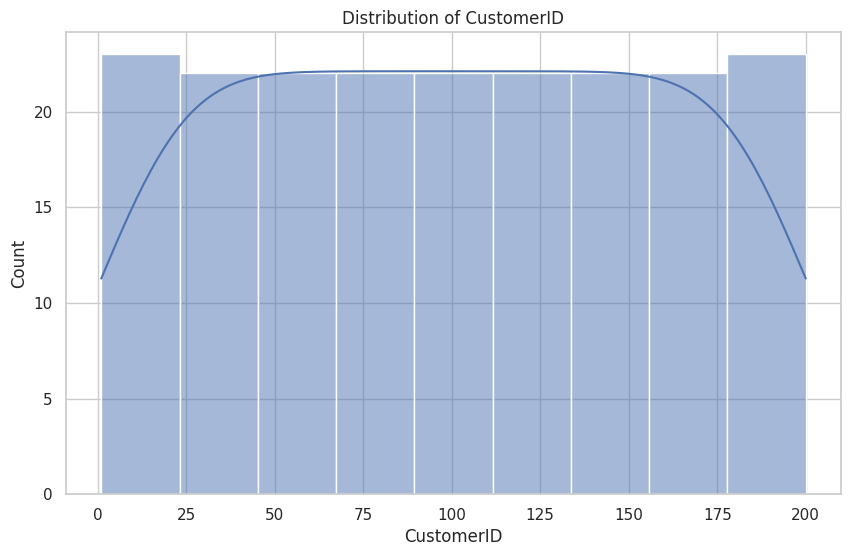

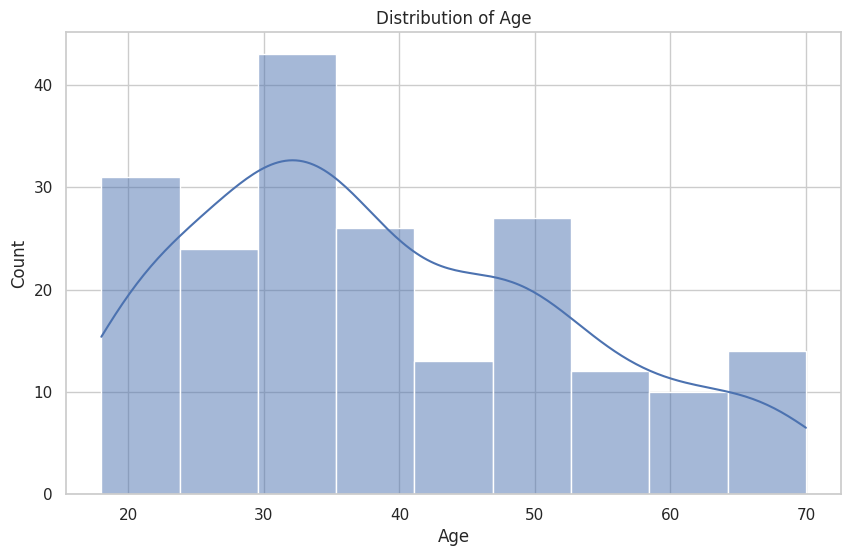

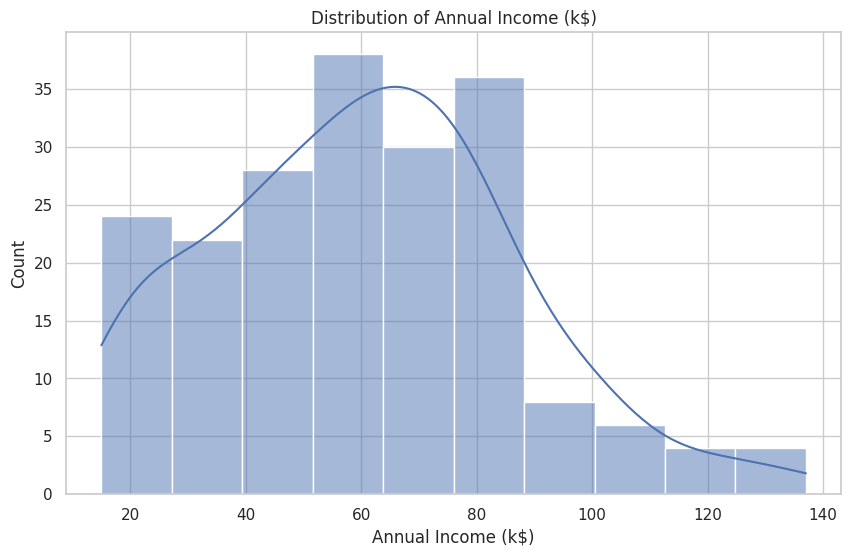

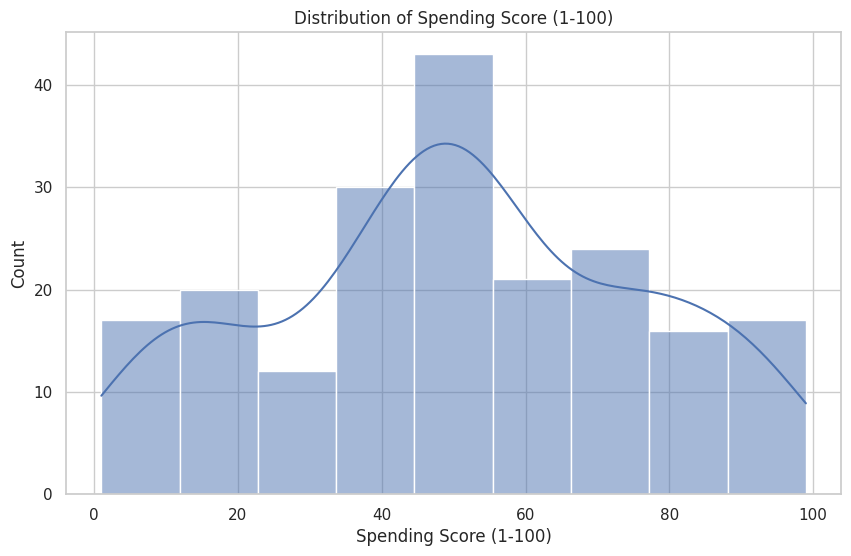

In [9]:
# Distribution of numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


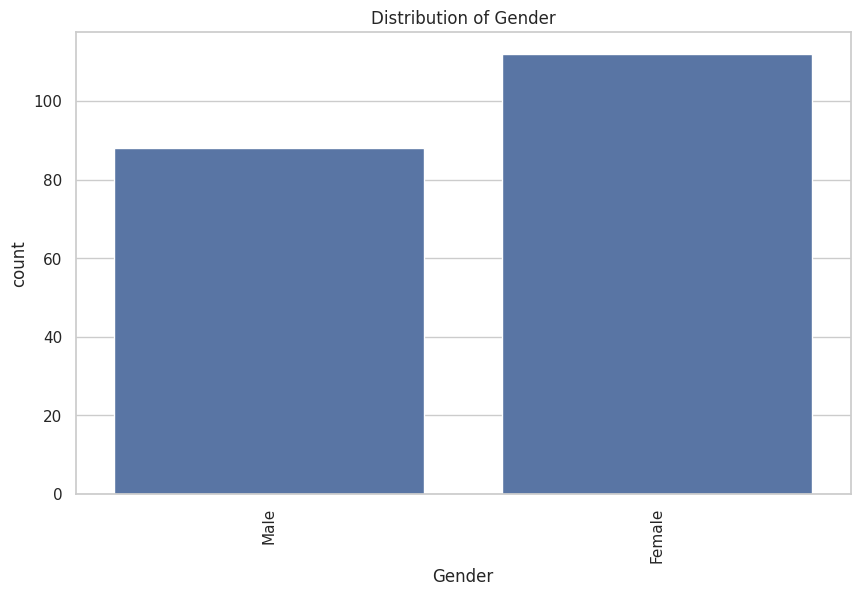

In [10]:
# Distribution of categorical features (if any)
categorical_features = data.select_dtypes(exclude=[np.number]).columns.tolist()

if categorical_features:
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=data[feature])
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=90)
        plt.show()
else:
    print("No categorical features found.")

**Bivariate Analysis**

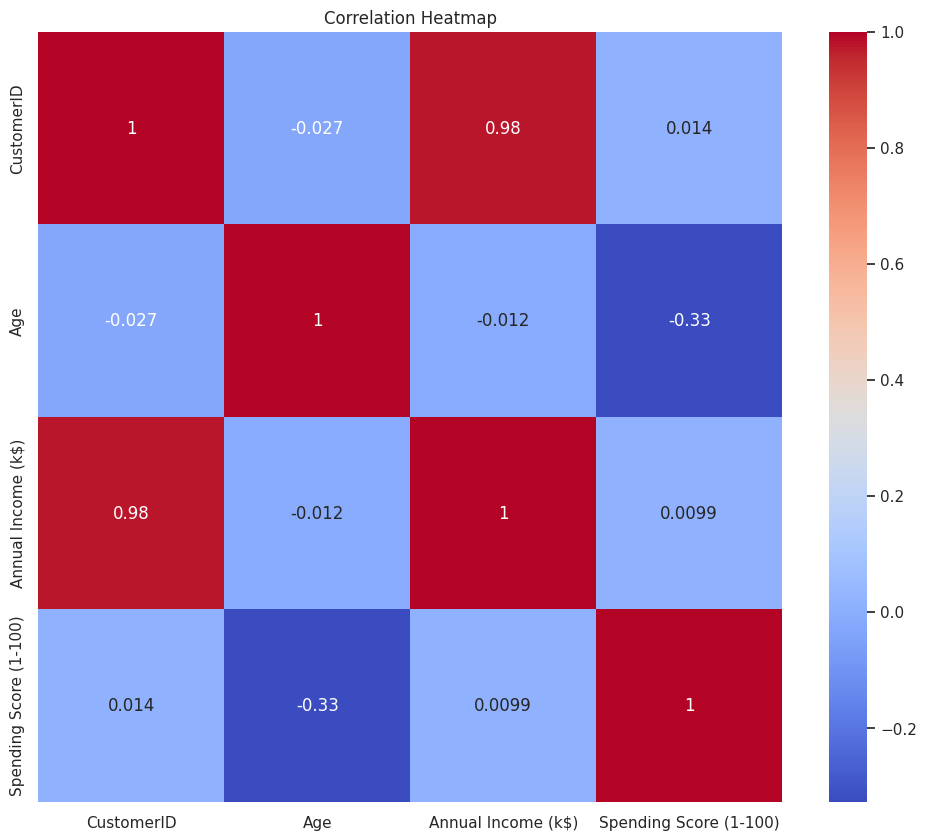

In [12]:
# Relationships between numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


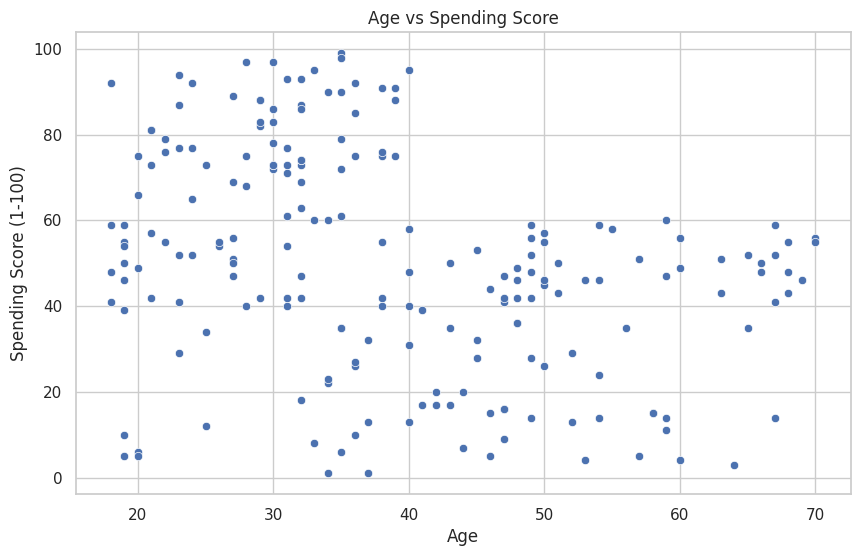

In [13]:
# Scatter plot between pairs of numerical features
# Example: 'Age' vs 'Spending Score (1-100)' (replace with relevant column names)
if 'Age' in data.columns and 'Spending Score (1-100)' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data)
    plt.title('Age vs Spending Score')
    plt.show()

**Time Series Analysis**

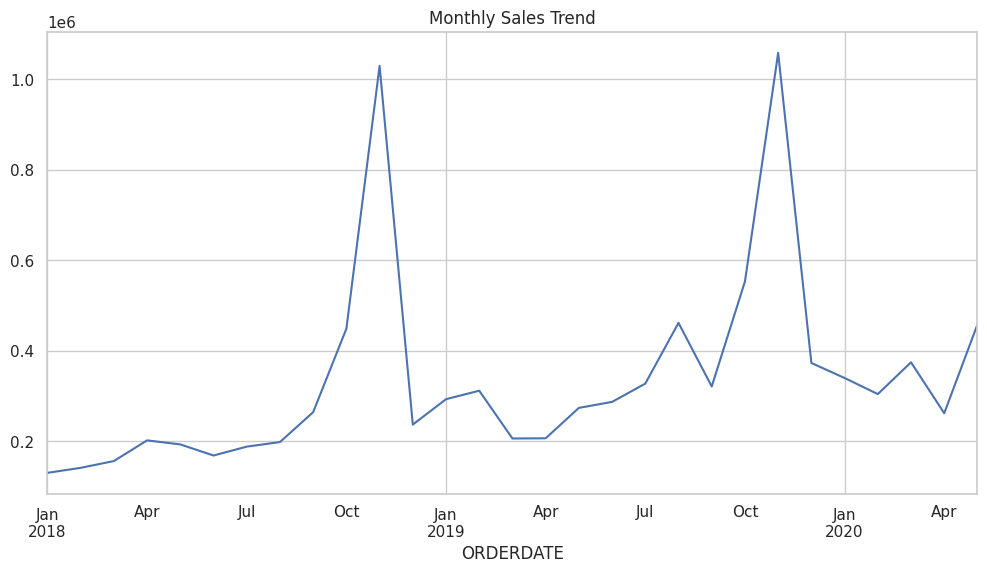

In [ ]:
# Trend analysis on ORDERDATE
data.set_index('ORDERDATE', inplace=True)

# Plotting sales over time
plt.figure(figsize=(12, 6))
data['SALES'].resample('M').sum().plot()
plt.title('Monthly Sales Trend')
plt.show()